In [1]:
import numpy as np
import pandas as pd

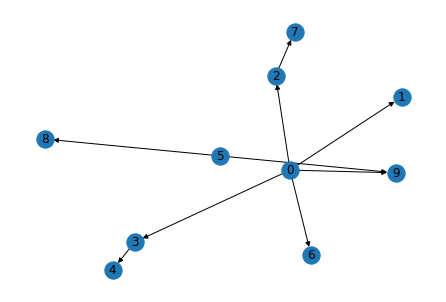

<Figure size 432x288 with 0 Axes>

In [2]:
from notebooks.CausalDataGenerator import CausalDataGenerator
RESOURCE_PATH = '../data/'
GRAPH_SIZE = 10
SAMPLE_SIZE = 100000
generator = CausalDataGenerator(resourcePath = RESOURCE_PATH, nodeCount= GRAPH_SIZE, sampleSize= SAMPLE_SIZE)
data = generator.generateDataFrame(np.square, generator.sigmoid)

In [3]:
data.head()

,X0,X2,X3,X4,X5,X6,X7,X8,X9,Y0,Y1
0,0.180345,0.506663,0.490646,0.296588,0.692839,0.697357,0.598017,0.267043,0.318898,0.824546,0.999806
1,0.346078,0.078244,0.902662,0.668966,0.505395,0.872893,0.471348,0.556581,0.322983,0.689284,0.999589
2,0.586912,0.326519,0.335208,0.735753,0.683628,0.856901,0.303502,0.246517,0.819808,0.923784,0.999925
3,0.313759,0.624052,0.436930,0.420981,0.189852,0.197810,0.307759,0.446763,0.921428,0.571743,0.999317
4,0.726934,0.444477,0.339919,0.194749,0.634440,0.789584,0.317578,0.251336,0.675415,0.993692,0.999994


In [4]:
def prepare_data(dataframe: pd.DataFrame):
    treatment = np.random.randint(0,2,data.shape[0])
    y1 = dataframe['Y1'].values
    y0 = dataframe['Y0'].values
    y =  [(b if t else a)
                for a, b, t in zip(y0, y1, treatment)]
    return dataframe.drop(['Y0','Y1'],axis=1).values,treatment,np.array(y)

In [5]:
X, treatment, y = prepare_data(data)

In [6]:
from causalml.inference.meta import BaseTRegressor,BaseXRegressor,BaseSRegressor

The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.


In [7]:
from notebooks.CausalNN import DNN_reg

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood a

In [14]:
data.head()

,X0,X2,X3,X4,X5,X6,X7,X8,X9,Y0,Y1
0,0.180345,0.506663,0.490646,0.296588,0.692839,0.697357,0.598017,0.267043,0.318898,0.824546,0.999806
1,0.346078,0.078244,0.902662,0.668966,0.505395,0.872893,0.471348,0.556581,0.322983,0.689284,0.999589
2,0.586912,0.326519,0.335208,0.735753,0.683628,0.856901,0.303502,0.246517,0.819808,0.923784,0.999925
3,0.313759,0.624052,0.436930,0.420981,0.189852,0.197810,0.307759,0.446763,0.921428,0.571743,0.999317
4,0.726934,0.444477,0.339919,0.194749,0.634440,0.789584,0.317578,0.251336,0.675415,0.993692,0.999994


In [17]:
real_ate = (data['Y1']-data['Y0']).mean()
real_ate

0.20703713316068714

In [10]:
learner_t = BaseTRegressor(learner=DNN_reg([256,128,64],X.shape[1]))
t_ate = learner_t.estimate_ate(X,treatment,y)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Lenovo\\AppData\\Local\\Temp\\tmpauiitqrv', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000020337352608>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Using default config.
INFO:tensorflow:Us

In [11]:
t_ate

(array([0.20024431]), array([0.19867293]), array([0.20181568]))

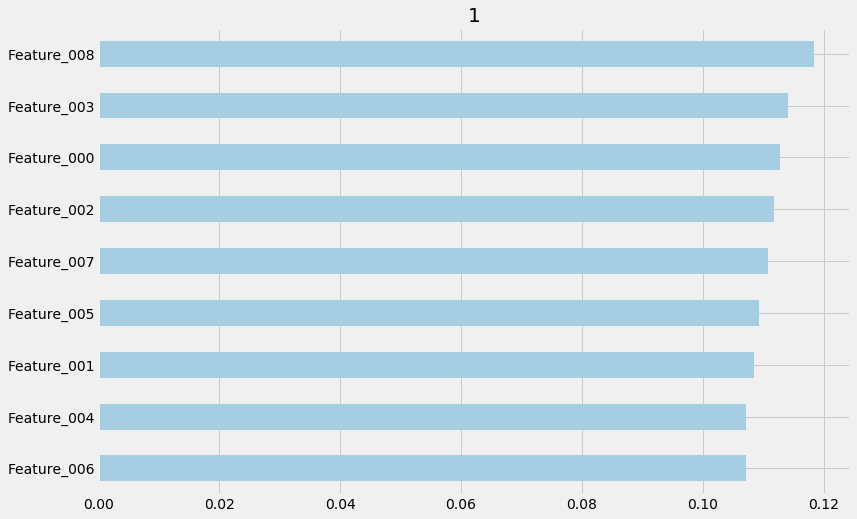

In [12]:
learner_t.plot_importance(X=X,tau=treatment,normalize=True,method='auto')

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


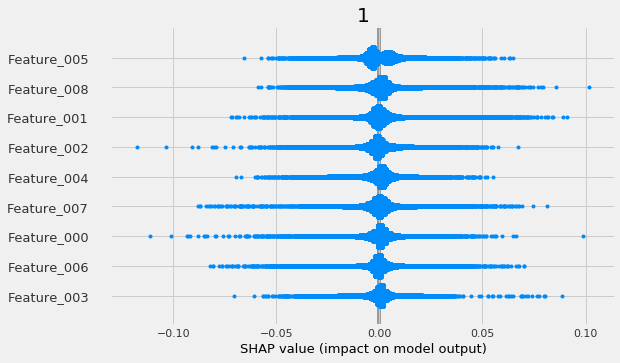

In [13]:
learner_t.plot_shap_values(X=X,tau=treatment)